### apriori 사이트
https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer_data=load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### 우리가 훈련을 하기 위한 데이터이며 X_data이다

In [3]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
X_data=cancer_data.data

In [5]:
y_label=cancer_data.target

In [6]:
np.shape(X_data)

(569, 30)

### test_size=0.2 설정때문에 train데이터가 0.8

In [7]:
X_train, X_test, y_train,y_test=train_test_split(X_data, y_label, test_size=0.2, random_state=20231024)

- 스태킹(stacking)
- 기본모델(knn, rf, adaboost)

In [8]:
#스태킹(stacking)
#기본모델(knn, rf, dt, adaboost)
knn_clf=KNeighborsClassifier(n_neighbors=5)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)

In [9]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

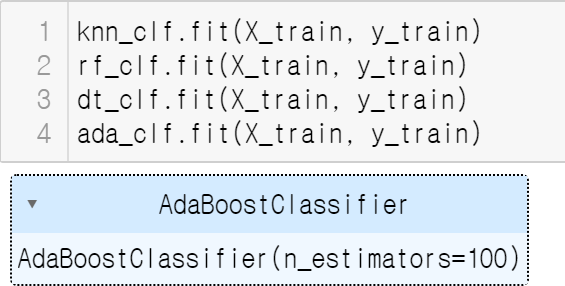
y_train이 정답

In [10]:
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
ada_pred=ada_clf.predict(X_test)

In [11]:
print(accuracy_score(y_test, knn_pred))
print(accuracy_score(y_test, rf_pred))
print(accuracy_score(y_test, dt_pred))
print(accuracy_score(y_test, ada_pred))

0.9298245614035088
0.9473684210526315
0.9473684210526315
0.9736842105263158


In [12]:
print(knn_pred)
print(rf_pred)
print(dt_pred)
print(ada_pred)

[1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1
 1 1 1]
[1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1
 1 0 0]
[1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1
 1 0 1]
[1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1
 1 0 1]


In [13]:
knn_pred.shape

(114,)

In [14]:
[knn_pred,rf_pred,dt_pred,ada_pred]

[array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1]),
 array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0]),
 array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 

In [15]:
np.array([knn_pred,rf_pred,dt_pred,ada_pred])

array([[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [16]:
pred=np.array([knn_pred,rf_pred,dt_pred,ada_pred])
pred.shape

(4, 114)

# np.transpose : 전체 행열에 대한것

In [17]:
pred=np.transpose(pred)
pred

array([[1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1,

In [18]:
pred.shape

(114, 4)

### 최종 스태킹 모델 : 로지스틱 회기

In [19]:
ir_final=LogisticRegression()

In [20]:
ir_final.fit(pred,y_test)

LogisticRegression()

In [21]:
final=ir_final.predict(pred)
final

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1])

In [22]:
accuracy_score(final, y_test)

0.9649122807017544

# 연관규칙

In [23]:
dataset=[['사과','치즈','생수'],
['생수','호두','치즈','고등어'],
['수박','사과','생수'],
['생수','호두','치즈','옥수수']]

In [24]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     -------                                  0.3/1.4 MB 5.2 MB/s eta 0:00:01
     ----------------                         0.6/1.4 MB 6.2 MB/s eta 0:00:01
     -----------------------------            1.1/1.4 MB 7.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [26]:
te=TransactionEncoder()

In [27]:
te.fit(dataset)

TransactionEncoder()

In [28]:
te_ary=te.fit(dataset).transform(dataset)

In [29]:
te_ary

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [30]:
te.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [31]:
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


### 지지도 설정(중요함)
### min_support= (최소지지도)

In [32]:
apriori(df, min_support=0.5)

,support,itemsets
0,0.50,(1)
1,1.00,(2)
2,0.75,(5)
3,0.50,(6)
4,0.50,"(1, 2)"
5,0.75,"(2, 5)"
6,0.50,"(2, 6)"
7,0.50,"(5, 6)"
8,0.50,"(2, 5, 6)"


#### 빈발항목집합

In [33]:
apriori(df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(생수, 치즈)"
6,0.50,"(호두, 생수)"
7,0.50,"(호두, 치즈)"
8,0.50,"(호두, 생수, 치즈)"


In [34]:
type(apriori(df, min_support=0.5, use_colnames=True))

pandas.core.frame.DataFrame

In [35]:
freq_itemsets=apriori(df, min_support=0.5, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(생수, 치즈)"
6,0.50,"(호두, 생수)"
7,0.50,"(호두, 치즈)"
8,0.50,"(호두, 생수, 치즈)"


### association_rules : 연관

In [36]:
association_rules(freq_itemsets)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(사과),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
1,(치즈),(생수),0.75,1.00,0.75,1.0,1.000000,0.000,inf,0.0
2,(호두),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
3,(호두),(치즈),0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5
4,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5
5,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
6,(호두),"(생수, 치즈)",0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5


In [37]:
res=association_rules(freq_itemsets,metric="lift")
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
8,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
9,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0


In [38]:
res[res["lift"]>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(호두),(치즈),0.50,0.75,0.5,1.000000,1.333333,0.125,inf,0.5
7,(치즈),(호두),0.75,0.50,0.5,0.666667,1.333333,0.125,1.5,1.0
8,"(생수, 호두)",(치즈),0.50,0.75,0.5,1.000000,1.333333,0.125,inf,0.5
10,"(생수, 치즈)",(호두),0.75,0.50,0.5,0.666667,1.333333,0.125,1.5,1.0
11,(호두),"(생수, 치즈)",0.50,0.75,0.5,1.000000,1.333333,0.125,inf,0.5
13,(치즈),"(생수, 호두)",0.75,0.50,0.5,0.666667,1.333333,0.125,1.5,1.0
